In [1]:
!wget https://zenodo.org/record/6957214/files/temporal_datasets.tgz -P ../data/01_raw
!tar -xzf ../data/01_raw/temporal_datasets.tgz -C ../data/01_raw

--2022-08-05 11:06:01--  https://zenodo.org/record/6957214/files/temporal_datasets.tgz
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3089789 (2.9M) [application/octet-stream]
Saving to: ‘../data/01_raw/temporal_datasets.tgz.1’

temporal_datasets.t 100%[===================>]   2.95M  1.24MB/s    in 2.4s    

2022-08-05 11:06:07 (1.24 MB/s) - ‘../data/01_raw/temporal_datasets.tgz.1’ saved [3089789/3089789]

tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.macl'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.FinderInfo'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.FinderInfo'


In [2]:
import os
import pandas as pd

In [3]:
DATAPATH = '../data/01_raw/temporal_datasets/cushing_2014_oklahoma/'
seismic_df = pd.read_csv(os.path.join(DATAPATH, 'seismic.csv'))
pressure_df = pd.read_csv(os.path.join(DATAPATH, 'pressure.csv'))

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [5]:
import numpy as np

In [6]:
from saif.crs_model.interface import CRSInterface

In [7]:
mpa_yr2pa_s = 1e6 / 365.25 / 86400

site_info = {
    'tectonic_shear_stressing_rate' : 3.5e-4 * mpa_yr2pa_s, # Pa / s
    'tectonic_normal_stressing_rate' : 0, # Pa/s
    'sigma' : 30 * 1e6, # Pa
    'biot' : 0.3, # dimensionless,
    'background_rate' : 1.36 / 365.25 / 86400
}

In [8]:
interface = CRSInterface(
    site_info, seismic_df, pressure_df,
    train_frac=0.75,
    signal_to_partition='magnitude', 
    threshold=0.01, min_dist=5,
    optimizer_method='newton-exact',
    max_iter=50, disp=2, lr=1e-3
)


In [9]:
interface.infer_partition()
interface.fit()

/home/caesar/fdl/saif/src/saif/crs_model/utils.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  peaks = torch.FloatTensor(peaks)[None, :, 0]


initial fval: 0.6388
iter   1 - fval: 0.0427 - info: 1
iter   2 - fval: 0.0427 - info: 2
iter   3 - fval: 0.0427 - info: 2
iter   4 - fval: 0.0427 - info: 2
iter   5 - fval: 0.0386 - info: 2
iter   6 - fval: 0.0386 - info: 2
iter   7 - fval: 0.0386 - info: 2
Optimization terminated successfully.
         Current function value: 0.038605
         Iterations: 7
         Function evaluations: 49


tensor([[0.6005, 0.0202, 0.0047]])

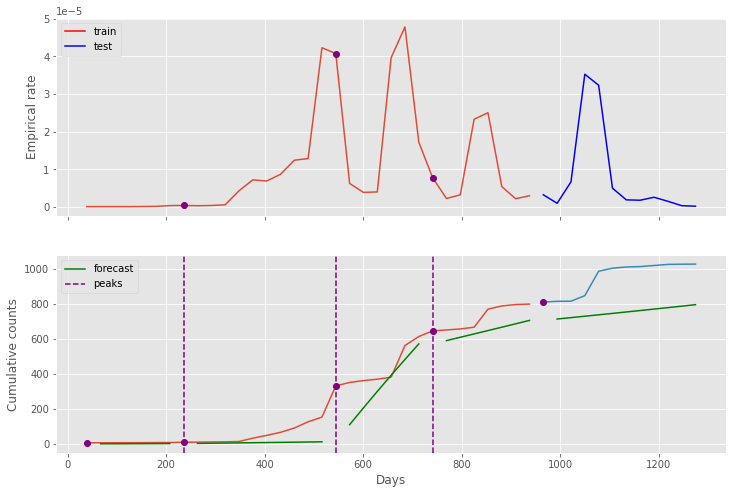

In [10]:
interface.plot_forecast()